In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [3]:
df_path = Path('..') / 'DATA' / 'Advertising.csv'
df = pd.read_csv(df_path)

FileNotFoundError: [Errno 2] No such file or directory: '..\\DATA\\Advertising.csv'

In [4]:
X = df.drop('sales', axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
poly_features = polynomial_converter.fit_transform(X)

In [9]:
poly_features.shape

(200, 9)

In [13]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [14]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

## Train | Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model = LinearRegression(fit_intercept=True)

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
test_predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [25]:
MAE

0.4896798044803529

In [26]:
MSE

0.4417505510403336

In [27]:
RMSE

0.664643175726896

In [28]:
df['sales'].mean()

14.0225

In [29]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):

    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate Errors

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later


    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

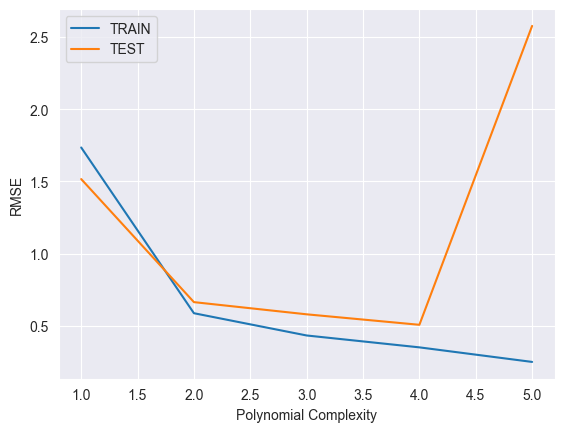

In [30]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

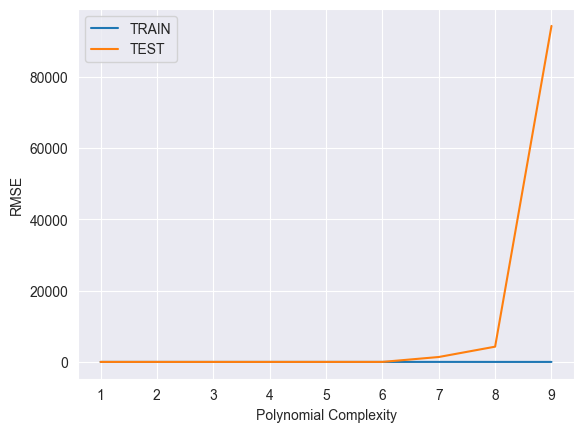

In [31]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

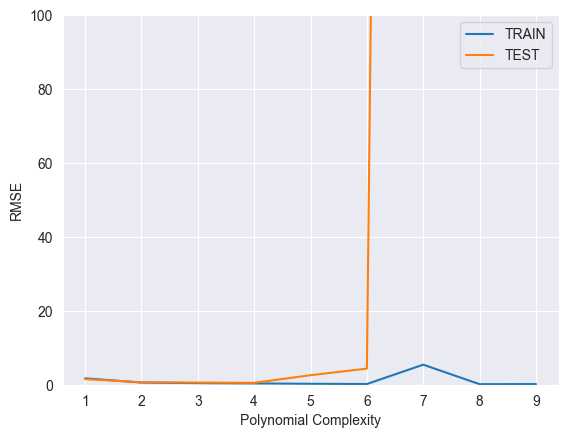

In [32]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

In [33]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [34]:
final_model = LinearRegression()

In [35]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [36]:
from joblib import dump, load

In [37]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [38]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [39]:
loaded_converter = load('final_converter.joblib')

In [40]:
campaign = pd.DataFrame([[149,22,12]], columns=['TV','radio','newspaper'])

In [41]:
campaign_poly = loaded_converter.transform(campaign)

In [42]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])